<img src="https://i.imgur.com/12tfKrD.png" alt="Alin">
</img>


# Demo RNN -- 張愛玲散文集AI二次創作

資料集: 張愛玲繁體中文小說 《傳奇》

爬蟲來源: [crawl_book](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)

程式碼參考: [Tensorflow](https://www.tensorflow.org/tutorials/text/text_generation)

本次資料集，著作權乃是張愛玲女士所擁有。**請勿將本次資料集散播、更改、用於非商業用途**。

> **資料集說明**

今年是張愛玲女士101年誕辰。張愛玲出生名門，曾就讀於香港大學和聖約翰大學，受過良好的中西教育。上海淪陷時期，陸續發表《沉香屑·第一爐香》、《傾城之戀》、《心經》、《金鎖記》等中、短篇小說，震動上海文壇。

這次訓練取張愛玲散文集《傳奇》作為訓練，《傳奇》收留五篇散文: 「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」。其中以「紅玫瑰與白玫瑰」最為膾炙人口。

> **訓練步驟**

深度學習在訓練模型上有以下幾個重要的步驟:
1. 讀入相關封包
2. 取得資料集 
3. 資料前處理
4. 建立模型
5. 制定訓練計畫
6. 評估模型
7. 做預測

> **本次模型介紹 RNN**

![](https://i.imgur.com/FaY50C8.png)


我們來看看維度，很多人會搞不懂RNN的維度:

一個Seq通過RNN後的維度

* Input: (Seq,${originDim}$)
* RNN Neuron: 2048
* Output: (Seq,2048) if (return_sequence == True) else (1,2048)
![](https://i.imgur.com/9SVl6JR.png)

![](https://i.imgur.com/z4ElFIr.png)

> **把生成問題變成分類問題**

![](https://i.imgur.com/TBHKuf6.png)


In [10]:
# ****************************************
# **請勿將本次資料集散播、用於非學術用途**
# ****************************************

# 執行即代表同意將會合法、合理使用資料集
# 太多人同時存取可能會報cannot retrieve file error
# 點擊you may still be able to access 下面那個連結再自行上傳檔案即可

!gdown --id 1E4YxLlApsfwOpTjxBvf9C2sYbcGG7oVx --output "./金庸《笑傲江湖》.txt"

# !wget -O Eileen_Legendary.txt "http://140.115.82.54/NN/Recurrent/Eileen_Legendary.txt"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E4YxLlApsfwOpTjxBvf9C2sYbcGG7oVx
To: /content/金庸《笑傲江湖》.txt
100% 2.95M/2.95M [00:00<00:00, 248MB/s]


## 1. 讀入Package

In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

## 2. 取得資料集

In [12]:
# 作業之一就是試試看其他本小說

book = ""
with open("./金庸《笑傲江湖》.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

book_length = len(book)
unique_words = set(book)
print(f"金庸《笑傲江湖》共有 {book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

金庸《笑傲江湖》共有 989231 字詞
包含了 3932 個獨一無二的字 (含標點符號)


《二○一五年十一月六日版》
《好讀書櫃》典藏版
第一章 滅門
和風薰柳，花香醉人，正是南國春光漫爛季節。
福建省福州府西門大街，青石板路筆直的伸展出去，直通西門。一座建構宏偉的宅第之前，左右兩座石壇中各豎一根兩丈來高的旗桿，桿頂飄揚青旗。右首旗上黃色絲線繡著一頭張牙舞爪、神態威猛的雄獅，旗子隨風招展，顯得雄獅更奕奕若生。雄獅頭頂有一對黑絲線繡的蝙蝠展翅飛翔。左首旗上繡著「福威鏢局」四個黑字，銀鉤鐵劃，剛勁非凡。
大宅朱漆大門，門上茶杯大小的銅釘閃閃發光，門頂匾額寫著「福威鏢局」四個金漆大字，下面橫書「總號」兩個小字。進門處兩排長櫈，分坐著八名勁裝結束的漢子，個個腰板筆挺，顯出一股英悍之氣。
突然間後院馬蹄聲響，那八名漢子一齊站起，搶出大門。只見鏢局西側門中衝出五騎馬來，沿著馬道衝到大門之前。當先一匹馬全身雪白，馬勒腳鐙都是爛銀打就，鞍上一個錦衣少年，約莫十八九歲年紀，左肩上停著一頭獵鷹，腰懸寶劍，背負長弓，潑喇喇縱馬疾馳。身後跟隨四騎，騎者一色青布短衣。
一行五人馳到鏢局門口，八名漢子中有三個齊聲叫了起來：「少鏢頭又打獵去啦！」那少年哈哈一笑，馬鞭在空中拍的一響，虛擊聲下，胯下白馬昂


## 3. 資料前處理

文字前處理有一堆方法、作法:
* 切字
* 還原
* 清除特殊字符
* 清除不常見字符 (StopWord)


我這裡僅使用去除不常見的字(StopWord)

In [13]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [15]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 2603


In [16]:
print(f"原本金庸《笑傲江湖》共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本金庸《笑傲江湖》共有 989231 字詞
去除不常出現的文字後
剩餘984914個字


In [17]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['\n', '二', '一', '五', '年', '十', '一', '月', '六', '日', '\n', '好', '讀', '書', '櫃', '典', '藏', '\n', '第', '一', '章', '滅', '門', '\n', '和', '風', '柳', '，', '花', '香', '醉', '人', '，', '正', '是', '南', '國', '春', '光', '漫']
----------------------------------------
轉成index : 
{647, 2452, 2295, 2205, 2590, 2591, 2593, 675, 2599, 2602, 2477, 2482, 2486, 2488, 2232, 2495, 1601, 1475, 197, 844, 1879, 1495, 2532, 1766, 2537, 2284, 2417, 1267, 1654, 2551, 504, 2425, 1274, 2431}


In [18]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [19]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[2590 2486 2599 2452 2431 2495 2599 2205 2417 2488 2590 2551 1267 1879
  197 1601 1766 2590 2295 2599  504], shape=(21,), dtype=int32)
['\n', '二', '一', '五', '年', '十', '一', '月', '六', '日', '\n', '好', '讀', '書', '櫃', '典', '藏', '\n', '第', '一', '章']
(21,)
tf.Tensor(
[1475 2532 2590 2537 2425  844 2602 2284 1654 1274 2591 2602 2477 2593
 2232 1495  647 2482  675 1550  252], shape=(21,), dtype=int32)
['滅', '門', '\n', '和', '風', '柳', '，', '花', '香', '醉', '人', '，', '正', '是', '南', '國', '春', '光', '漫', '爛', '季']


![](https://i.imgur.com/YMVMFEJ.png)


In [20]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

![](https://i.imgur.com/YoHWLkf.png)


In [21]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['\n', '二', '一', '五', '年', '十', '一', '月', '六', '日', '\n', '好', '讀', '書', '櫃', '典', '藏', '\n', '第', '一']
Target: ['二', '一', '五', '年', '十', '一', '月', '六', '日', '\n', '好', '讀', '書', '櫃', '典', '藏', '\n', '第', '一', '章']
--------------------------------------------------
Input : [2590 2486 2599 2452 2431 2495 2599 2205 2417 2488 2590 2551 1267 1879
  197 1601 1766 2590 2295 2599]
Target: [2486 2599 2452 2431 2495 2599 2205 2417 2488 2590 2551 1267 1879  197
 1601 1766 2590 2295 2599  504]


In [22]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

## 4. 建立模型

![](https://i.imgur.com/TBHKuf6.png)

In [23]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         1332736   
                                                                 
 lstm (LSTM)                 (None, None, 4096)        75513856  
                                                                 
 lstm_1 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense (Dense)               (None, None, 2603)        5333547   
                                                                 
Total params: 132,519,979
Trainable params: 132,519,979
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 2603)
Model target shape : (64, 20)


In [25]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
搶著將眾人如何議論劉正風金盆洗手、莫大先
----------------------------------------
輸入尚未訓練的model後獲得：

插呻呻鬼鬼鬼鬼漲漲袱赤赤衡衡衡衡衡談顆顆


## 5. 制定訓練計畫並訓練

* [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) V.S. [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy)

```python=
# categorical_crossentropy
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

# sparse_categorical_crossentropy
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

```


In [26]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [27]:
EPOCHS = 20
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)

Epoch 1/20
732/732 [==============================] - 290s 391ms/step - loss: 5.1959
Epoch 2/20
732/732 [==============================] - 292s 398ms/step - loss: 4.1910
Epoch 3/20
732/732 [==============================] - 291s 397ms/step - loss: 3.7916
Epoch 4/20
732/732 [==============================] - 292s 399ms/step - loss: 3.5141
Epoch 5/20
732/732 [==============================] - 292s 399ms/step - loss: 3.2723
Epoch 6/20
732/732 [==============================] - 292s 398ms/step - loss: 3.0302
Epoch 7/20
732/732 [==============================] - 292s 398ms/step - loss: 2.7731
Epoch 8/20
732/732 [==============================] - 291s 398ms/step - loss: 2.4907
Epoch 9/20
732/732 [==============================] - 292s 398ms/step - loss: 2.1833
Epoch 10/20
732/732 [==============================] - 292s 398ms/step - loss: 1.8560
Epoch 11/20
732/732 [==============================] - 292s 398ms/step - loss: 1.5253
Epoch 12/20
732/732 [==============================] - 292s 399

## 6. 衡量模型

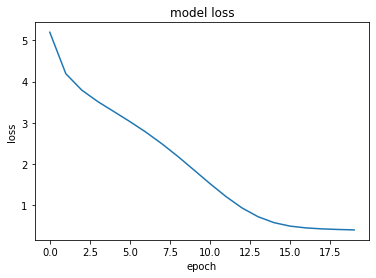

In [28]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [30]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
搶著將眾人如何議論劉正風金盆洗手、莫大先
----------------------------------------
輸入進訓練後的model後獲得：

劫將眾人如何議論劉正風金盆洗手、莫大先生


## 7. 做預測

![](https://i.imgur.com/YsOj6Mw.png)

在實際生成文字時，我們會想要增加一些隨機性。比如”天天出去” 不加入隨機 “天天天天” 如果我們全部輸出的字都是取softmax最大可能性，則一個訓練完美的model會把整本書給輸出出來。但是我們要的是，希望電腦在最大可能性的幾個字中隨機挑選一個字出來。

tf.random.categorical 會根據softmax機率後隨機挑選字，但是我們不希望因為模型很爛導致不合理的字被選中，因此我們會除上一個temperature來增加可能字的比重。

EX: "天天出去" 預測下一個字
1. 玩 : 0.3 
2. 天 : 0.1 
3. 浪 : 0.4 

"天"有的機率被印出，我們不希望。所以我們可以在每一個機率除上一個temperature(0.01)
1. 玩 : 30 
2. 天 : 10 
3. 浪 : 40 
原本"浪"跟"天"差0.3，除temperature後差30



In [31]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

In [34]:
init_seq = "任盈盈"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,500)

任盈盈死了，你怎地如此胡塗？」岳靈珊道：「我……我怎能是除了辟邪劍譜？」林平之道：「我怎知道？」林平之道：「我在恆山上出手，你殺我而已。」
令狐冲「嗯」了一聲，心想：「原來是一個小小婆娘打扮的，有甚麼不好？」岳靈珊道：「是，是。」林平之道：「不錯，我自宮之後，仍和你師娘人數雖大，說過的話，卻和田伯光一定喜歡了喉嚨，便要走上山去。」
令狐冲和盈盈又感欣點嘴角，不知去向。


令狐冲和盈盈交個朋友求死，大家分明以後，必定要一場不勝。」說著挺劍直向他左肩。令狐冲見過要倒地的好看，已然熟了，也沒加傷的傷口，便道：「好，我送你去見師娘。」
令狐冲默然不語。
這日令狐冲已經得過今日，他一直要自己拿了去，自己自然只有自殺盈盈，隨即也切他不得其事，心下也就不想，但從前十餘人也是十分聰明機境，其實本事雖在頗深，心想：「這位佛門高僧不通世務，當真得深自可。」
耳聽得定靜師太從南安客店中出來。
※※※
令狐冲躬身從馬匹走了開去，一張椅便給噴了出去。
令狐冲忽覺右臂上劇痛，右臂小腹中登時露出了一隻青布長袍，只嚇得手中發出半截聲音，跟著砰拍之聲大作。
令狐冲心想：「青城派那姓余的小子無冤無仇，為甚麼要拘留任小姐？你是

In [ ]:
# 不要執行這一個block
import time
while True:
  time.sleep(5)
  pass

## 作業2.1 (30%)

使用[爬蟲程式](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)來取得一個新的文本資料集，或是不管你從哪裡取得的資料集也可以(不要再張愛玲了，不限中英文)。然後丟入這個模型來看看AI生成文字的成果，將**結果**與**你的心得**(不是機器產生的心得)，貼上pdf。

請隨意修改本colab的模型與參數來達到更好的結果。

資料集越有趣越好，比如你可以去爬PTT文章來製作廢文產生器。去爬Dcard製作幻想文產生器。